# Digit Recognizer (Kaggle)

<img src="https://www.researchgate.net/profile/Hugo-Larochelle/publication/200744481/figure/fig1/AS:668968306098181@1536505881710/Samples-from-the-MNIST-digit-recognition-data-set-Here-a-black-pixel-corresponds-to-an.png" style="width:450;height:300px;">

### 1. Packages

In [40]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 2. Data Preparation

We are going to start by loading the datasets from the CSV files into a pandas DataFrames

In [41]:
#Training set
train = pd.read_csv("./data/train.csv")
#Test set
test  = pd.read_csv("./data/test.csv")

In [42]:
# Training set label's
y_train = train["label"]
# Trainable values, the pixels in our case
x_train = train.drop("label", axis = 1)

So after recuperating the data, We need to have stats about the training.

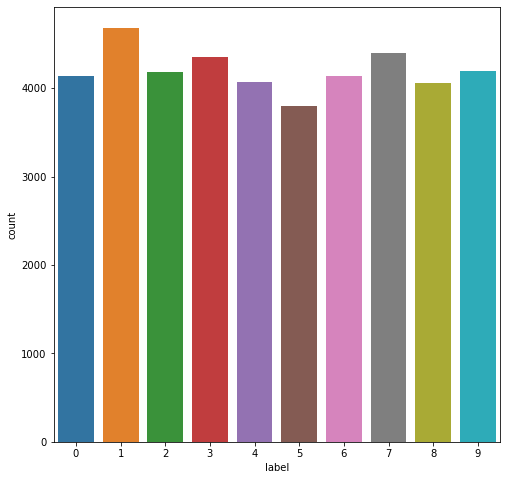

In [43]:
plt.figure(figsize=(8,8))
g = sns.countplot(x = y_train)

From this plot, we can see clearly that the dataset is balanced and training a model on this set will train different images of different digits

In [44]:
y_train.value_counts().sort_values(ascending = False)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Let's see if we have some missing data ..

In [45]:
na_values = x_train.isnull().sum(axis = 1).sum() #Missing values
print("The number of missing values in the whole dataset is:", na_values)

The number of missing values in the whole dataset is: 0


In [46]:
#Scalling the values
x_train = x_train/255
x_test  = test/255

In [47]:
print("[Befor reshaping]")
print("The training set shape is:", x_train.shape)
print("The test set shape is:",  x_test.shape)

[Befor reshaping]
The training set shape is: (42000, 784)
The test set shape is: (28000, 784)


In [48]:
#Reshaping the training 28x28
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [49]:
print("[After reshaping]")
print("The training set shape is:", x_train.shape)
print("The training labels set shape is:", y_train.shape)
print("The test set shape is:",  x_test.shape)

[After reshaping]
The training set shape is: (42000, 28, 28, 1)
The training labels set shape is: (42000,)
The test set shape is: (28000, 28, 28, 1)


Here is some examples from the training ..

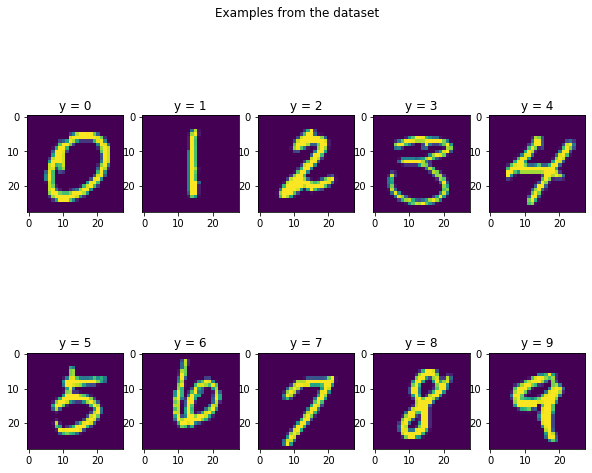

In [50]:
fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle('Examples from the dataset')
indices = [np.random.choice(np.where(y_train == i)[0]) for i in range(10)]
for i, index in enumerate(indices):
    ax[i//5, i%5].imshow(x_train[index,:,:, 0])
    ax[i//5, i%5].set_title("y = "+str(y_train[index]))

The output of our model must be a 10 neurons layer, where we will apply a softmax

In [51]:
y_train = to_categorical(y_train, num_classes = 10)

In [52]:
print("After transforming the output to one hot encoding")
print("The new shape of the output is ",y_train.shape)

After transforming the output to one hot encoding
The new shape of the output is  (42000, 10)


In [53]:
#Spliting the data set into 15% for validation and 85% for training
RANDOM = 3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=RANDOM, test_size=0.15 )

In [54]:
print("Training set shape :",x_train.shape)
print("Training set labels shape :",y_train.shape)
print("Validation set shape :",x_val.shape)
print("Validation set labels shape :",y_val.shape)

Training set shape : (35700, 28, 28, 1)
Training set labels shape : (35700, 10)
Validation set shape : (6300, 28, 28, 1)
Validation set labels shape : (6300, 10)


### 3. The model

In [58]:
def model():
    """
    Implement the digit recognizer model composed from Conv Layers and Max pooling layers basicly.
    
    Arguments:
        None
    
    Returns:
        model -- a keras instance model with the image as input 
    """
    
    ## Input Layer of shape 28x28
    inputs = Input(shape=(28, 28, 1))
    
    ## Conv2D with 10 3x3 filters, same padding and ReLU activation
    x      = Conv2D(10, 3, activation="relu", padding='same')(inputs)
    ## Max Pooling 2D with 2x2 pool size
    x      = MaxPool2D(2, 2)(x)
    
    ## Conv2D with 16 5x5 filters, stride = 1 and ReLU activation
    x      = Conv2D(16, 5, activation="relu")(x)

    ## Max Pooling 2D with 2x2 pool size
    x      = MaxPool2D(2, 2)(x)
    
    ## Flatten the previous layer
    x      = Flatten()(x)
    
    ## Layer of 120 units and ReLU activation
    x      = Dense(120, activation="relu")(x)
    
    ## Layer of 84 units and ReLU activation
    x      = Dense(84, activation="relu")(x)
    
    ## Output of 10 units with softmax activation
    outputs = Dense(10, activation="softmax")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

Let's train our model ..

In [59]:
model = model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        4016      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               4812

In [60]:
EPOCHS = 25
BATCH_SIZE = 64
history = model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE,
    epochs=EPOCHS, validation_data=(x_val, y_val))

2021-10-13 23:50:26.593418: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 111955200 exceeds 10% of free system memory.


Epoch 1/25
558/558 [==============================] - 9s 16ms/step - loss: 0.3126 - accuracy: 0.9030 - val_loss: 0.1094 - val_accuracy: 0.9663
Epoch 2/25
558/558 [==============================] - 9s 16ms/step - loss: 0.0820 - accuracy: 0.9744 - val_loss: 0.0763 - val_accuracy: 0.9770
Epoch 3/25
558/558 [==============================] - 9s 16ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0730 - val_accuracy: 0.9767
Epoch 4/25
558/558 [==============================] - 10s 18ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0614 - val_accuracy: 0.9817
Epoch 5/25
558/558 [==============================] - 9s 15ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0535 - val_accuracy: 0.9843
Epoch 6/25
558/558 [==============================] - 8s 15ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0544 - val_accuracy: 0.9830
Epoch 7/25
558/558 [==============================] - 8s 15ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0723 - val_accuracy: 0.979

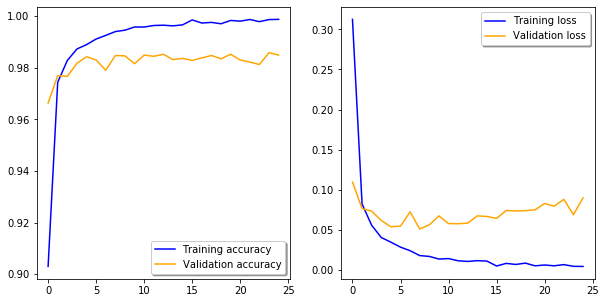

In [61]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))

#Accuracy plot
ax[0].plot(history.history["accuracy"], color='b', label="Training accuracy")
ax[0].plot(history.history["val_accuracy"], color='orange', label="Validation accuracy")
ax[0].legend(loc='best', shadow=True)

#Loss plot
ax[1].plot(history.history["loss"], color='b', label="Training loss")
ax[1].plot(history.history["val_loss"], color='orange', label="Validation loss")
ax[1].legend(loc='best', shadow=True)


In [62]:
#Prediction on the validation set
y_pred = np.argmax(model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis = 1)
diff = y_true-y_pred != 0

Let's see how where our model has done errors .. 

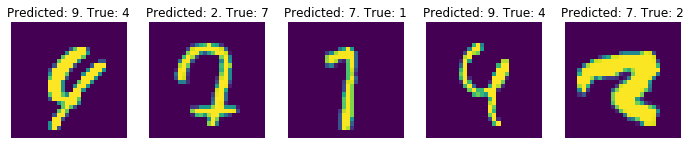

In [86]:
from random import choices
ens_index = set()
for index, val in enumerate(diff):
    if (val): ens_index.add(index)
indices = choices(list(ens_index), k=16)
plt.figure(figsize=(12, 6))
for i in range(5):
    index = indices[i]
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_val[index,:,:,0])
    plt.title("Predicted: "+str(y_pred[index])+". True: "+str(y_true[index]))
    plt.axis("off")

### We can see clearly that even us as humans we can not distuing the real value of those handwritten digits. 

In [44]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)
predictions = pd.Series(predictions,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
submission.to_csv("submission.csv",index=False)